### QQPlots

Load in the data below, and use the exercises to assist with answering the quiz questions below.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [37]:
print("seaborn version: {}".format(sns.__version__))
sb.set(style="whitegrid")

seaborn version: 0.9.0


In [5]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [6]:
sample_data.height.describe()

count    200.000000
mean      67.579074
std        3.173014
min       57.565921
25%       65.071402
50%       67.842137
75%       69.904792
max       76.194046
Name: height, dtype: float64

In [7]:
# 3 and 7
height_min = sample_data.height.describe()[3]
height_max = sample_data.height.describe()[7]
number_of_values = sample_data.shape[0]

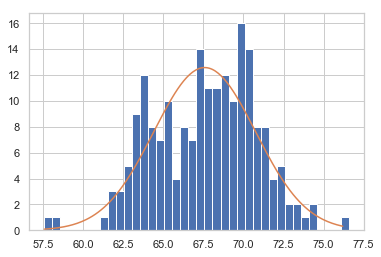

In [38]:
# create a histogram of the data
bin_size = 0.5
bin_edges = np.arange(height_min, height_max + bin_size, bin_size)
plt.hist(data = sample_data, x = 'height', bins = bin_edges);


# overlay a theoretical normal distribution on top
samp_mean = sample_data['height'].mean()
samp_sd = sample_data['height'].std()

from scipy.stats import norm

x = np.linspace(height_min, height_max, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= number_of_values * bin_size # scale the distribution height
plt.plot(x, y);


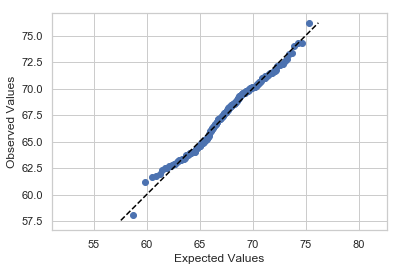

In [39]:
n_points = number_of_values
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)
plt.scatter(expected_vals, sample_data['height'].sort_values())
plt.plot([height_min,height_max],[height_min,height_max],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values');


Text(0, 0.5, 'Observed Standard Scores')

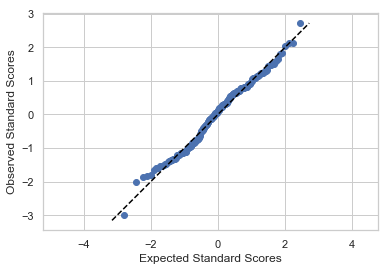

In [40]:
height_min_scaled = (height_min - samp_mean) / samp_sd
height_max_scaled = (height_max - samp_mean) / samp_sd
expected_scores = norm.ppf(qs)
data_scores = (sample_data['height'].sort_values() - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([height_min_scaled,height_max_scaled],[height_min_scaled,height_max_scaled],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores') 


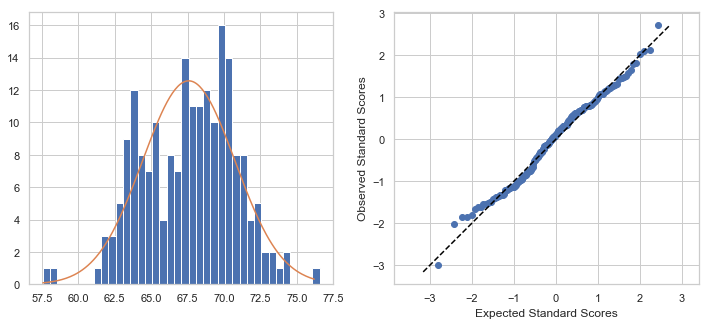

In [41]:
plt.figure(figsize = [12, 5])
# left subplot: plot the data
# create a histogram of the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(height_min, height_max + bin_size, bin_size)
plt.hist(data = sample_data, x = 'height', bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = sample_data['height'].mean()
samp_sd = sample_data['height'].std()
from scipy.stats import norm
x = np.linspace(height_min, height_max, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= number_of_values * bin_size # scale the distribution height
plt.plot(x, y);
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
height_min_scaled = (height_min - samp_mean) / samp_sd
height_max_scaled = (height_max - samp_mean) / samp_sd
expected_scores = norm.ppf(qs)
data_scores = (sample_data['height'].sort_values() - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([height_min_scaled,height_max_scaled],[height_min_scaled,height_max_scaled],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores');

Text(0, 0.5, 'Observed Standard Scores')

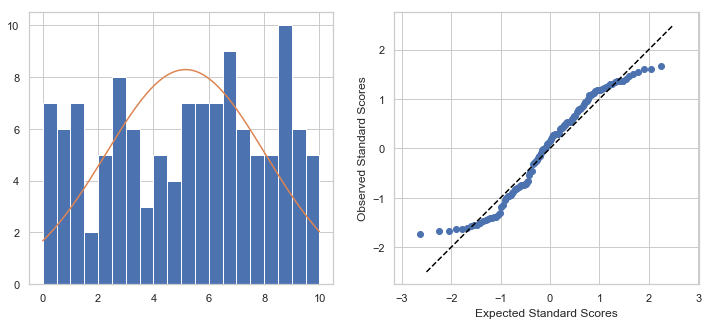

In [42]:
# generate the data

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)
# set up the figure
plt.figure(figsize = [12, 5])
# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x = unif_data, bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()
from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')


<BarContainer object of 81 artists>

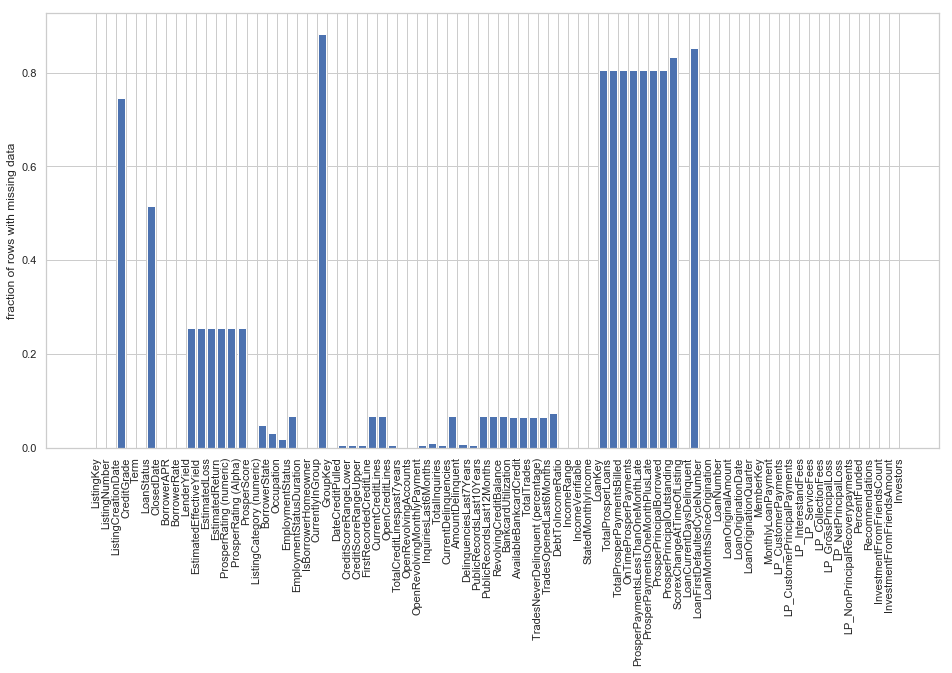

In [43]:
df=pd.read_csv('prosperLoanData.csv')
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<BarContainer object of 81 artists>

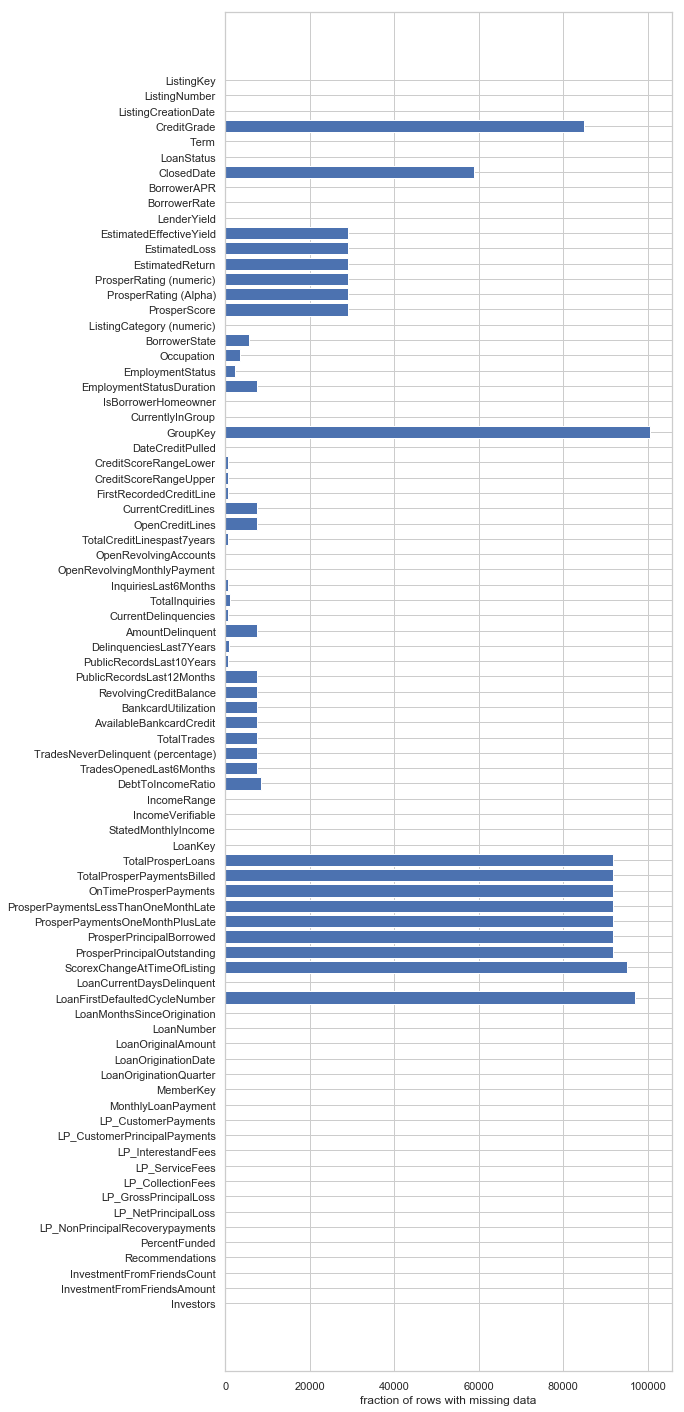

In [44]:
null_counts = df.isnull().sum()/1
plt.figure(figsize=(8,25))
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.xlabel('fraction of rows with missing data')
plt.gca().invert_yaxis()
plt.barh(np.arange(len(null_counts)),null_counts)

/Users/moosial/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


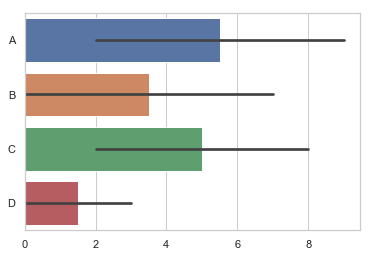

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.DataFrame(np.random.randint(0,10,size=(2, 4)), columns=list('ABCD'))
sns.barplot(data=df, orient = 'h');

In [ ]:
df

In [17]:
len(null_counts)

81

In [30]:
null_counts

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

In [49]:
import scipy as sci

In [54]:
sci.stats.shapiro(sample_data.height)

(0.9869360327720642, 0.06234946846961975)